In [1]:

from sklearn.neural_network import MLPClassifier, MLPRegressor
import numpy as np
import pandas as pd
import anndata
from matplotlib import pyplot as plt

import seaborn as sns

import scanpy as sc

import os

<h4>Import scATAC<h4>

In [43]:
genes_df = pd.read_csv("./data/atac_data/genes_atac.tsv", sep='\t')
atac_df = pd.read_csv("./data/atac_data/matrix_atac.tsv", sep='\t')
barcodes_df = pd.read_csv("./data/atac_data/barcodes_atac.tsv", sep='\t')

In [50]:
atac_df.head(100)
df = atac_df.iloc[:, 1:]
atac_df.transpose().describe()
#df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
count,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000
mean,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,0.403290,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,-0.010785
std,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.316651,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.139183
min,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,-0.167156
25%,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,-0.095788
50%,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,0.228224,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,-0.014937
75%,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.341274,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,0.070066
max,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.866472,-0.214832,-0.245019,...,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789,0.153889


<h1>UMAP and PCA</h1>
https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [53]:


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap.plot
import umap


In [54]:
reducer = umap.UMAP()

umap_data = df.values
scaled_data = StandardScaler().fit_transform(umap_data)

embedding = reducer.fit_transform(scaled_data)
embedding.shape

AttributeError: module 'umap' has no attribute 'UMAP'

In [7]:
plt.scatter(embedding[:, 0],embedding[:, 1])
    #c=[sns.color_palette()[x] for x in df.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of scATAC data', fontsize=24)


NameError: name 'embedding' is not defined

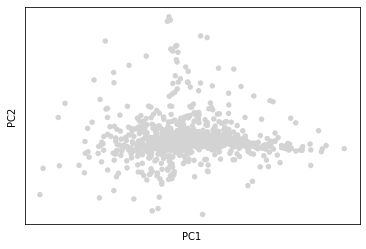

In [ ]:
with open("./data/atac_data/matrix_atac.tsv") as your_data:
    adata = anndata.read_csv(your_data, delimiter='\t')

sc.tl.pca(adata)
sc.pl.pca(adata)
#sc.pl.pca(adata)

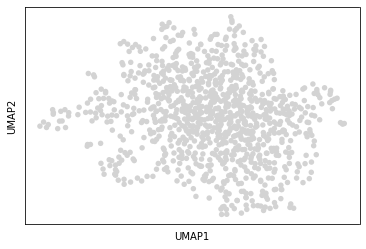

In [ ]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=40)
sc.tl.umap(adata, spread=1.5, min_dist=.9, random_state=20)
sc.pl.umap(adata)

<AxesSubplot:>

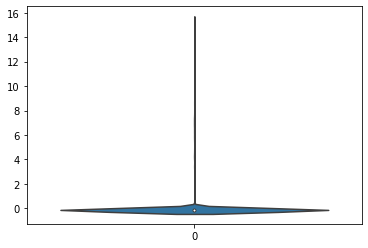

In [ ]:
df.loc[56]
sns.violinplot(data=df.loc[56], jitter=0.4)

<h1>Predict B Cell Pathway Scores from scATACseq data</h1>

<h4>Use pseudobulk scRNAseq?</h4>
#https://www.youtube.com/watch?v=797iq6m64w0

In [17]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split

In [3]:
sing = pd.read_csv('./data/sing_scores.tsv', sep='\t')
atac_df = pd.read_csv("./data/atac_data/matrix_atac.tsv", sep='\t')

atac_df
atac = atac_df.iloc[:, 1:]
atac.head(10)

,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,AAACATGCACTTGTTC-1,...,TTTGTGTTCGATAACC-1,TTTGTGTTCGGGACCT-1,TTTGTGTTCGTCAAGT-1,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
0,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,...,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744
1,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,...,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420
2,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,...,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548
3,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,...,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238
4,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,...,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971
5,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,...,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783,-0.110783
6,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,...,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002,-0.164002
7,1.866472,1.166208,-0.709761,-0.709761,0.266226,0.909591,0.808395,-0.709761,0.998236,-0.709761,...,1.675700,-0.709761,-0.709761,-0.709761,-0.709761,1.282474,-0.709761,-0.709761,-0.709761,-0.709761
8,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832,...,-0.214832,-0.214832,-0.214832,-0.214832,8.229245,-0.214832,-0.214832,-0.214832,-0.214832,-0.214832
9,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,...,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019,-0.245019


<h4 style="color:#ff9966"> Drop Regions with Low Variance</h4>


In [68]:
#Remove regions where std=0
reg = atac.transpose()
reg.describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,...,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000
mean,-0.003070,-0.002151,-0.000922,0.001699,0.000159,-0.001223,0.000899,0.001591,0.000225,-0.003773,...,0.001980,-0.003774,0.000163,0.000956,-0.000253,0.001958,-0.001886,-0.001241,-0.000975,-0.000101
std,0.986899,0.993915,0.980539,1.010422,1.004439,0.994993,1.004294,1.003440,1.005550,0.987845,...,1.013093,0.982666,1.002482,1.005245,1.000466,1.003827,0.995827,0.998245,0.987921,1.004276
min,-0.075744,-0.116420,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.066490,-0.048972,-0.175789
25%,-0.075744,-0.116420,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.066490,-0.048972,-0.175789
50%,-0.075744,-0.116420,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.066490,-0.048972,-0.175789
75%,-0.075744,-0.116420,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,0.852079,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,0.854393,-0.346761,-0.171364,-0.066490,-0.048972,-0.175789
max,31.981493,17.436842,33.499830,22.318361,23.783980,18.751770,18.337399,4.711770,10.931227,8.693009,...,26.242147,17.348585,19.695711,18.356981,4.761416,8.334252,15.122928,37.153200,47.842680,14.643348


In [79]:
reg.loc[:, reg.std() > 0.9]


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
AAACAGCCAATCCCTT-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.866472,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
AAACAGCCAATGCGCT-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.166208,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
AAACAGCCACCAACCG-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
AAACAGCCAGGATAAC-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
AAACAGCCAGTAGGTG-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,0.266226,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,1.644300,-0.346761,-0.171364,-0.06649,7.911695,-0.175789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGACATGC-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.282474,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
TTTGTTGGTGTTAAAC-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
TTTGTTGGTTAGGATT-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789
TTTGTTGGTTGGTTAG-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-0.074689,-0.122644,-0.101665,-0.113537,-0.632307,-0.346761,-0.171364,-0.06649,-0.048972,-0.175789


In [101]:
#Select a subsample of cells/barcodes to set as X (the predictor)
features = 100
atac2 = atac.transpose()
atac3 = atac2.iloc[:, 0:features].transpose()
#features = [0,100]
#atac2.transpose()[100]
#['AAACAGCCAATCCCTT-1','AAACAGCCAATGCGCT-1', 'AAACAGCCACCAACCG-1', 'AAACAGCCAGGATAAC-1']
atac3

,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,AAACATGCACTTGTTC-1,...,TTTGTGTTCGATAACC-1,TTTGTGTTCGGGACCT-1,TTTGTGTTCGTCAAGT-1,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
0,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,...,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744
1,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,...,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420
2,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,...,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548
3,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,...,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238
4,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,...,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.349844,0.744676,-0.876536,-0.876536,0.563343,1.348053,1.230084,-0.876536,-0.876536,-0.876536,...,0.402362,0.384516,-0.876536,0.684424,-0.876536,-0.876536,-0.876536,1.309321,0.719594,1.211556
96,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,...,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289
97,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,...,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057
98,-0.667272,-0.667272,2.404169,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,...,-0.667272,0.799157,-0.667272,-0.667272,-0.667272,-0.667272,2.143346,-0.667272,-0.667272,-0.667272


In [119]:
sing
sing2 = sing.set_index('cell_ids')
sing3 = sing2.iloc[:, 0:features].transpose()
#sing3 = sing2.loc[100]
sing3

cell_ids,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACACTAAT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,...,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTCCACAAA-1,TTTGTTGGTCTTTATG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGCAGTA-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
Bcell_score,-0.071999,0.042124,0.047899,0.153889,-0.167156,0.139602,0.160736,0.165148,0.052274,0.039602,...,0.269337,-0.069307,0.264013,0.1398,0.047503,0.253775,0.053615,0.044638,0.047144,0.155944


In [129]:

atac4 = atac3
#Rename columns to cell_ids
atac4 = atac4.rename_axis('cells_ids',axis='columns')

#Remove Bcell_Score label
sing4 = sing3.rename(columns={'Bcell_score':''})

#Append sing scores to last row

atac5 = atac4.append(sing4)

#Remove Bcell_score indexing
atac6 =atac5.dropna(axis=1).reset_index()
atac_df = atac6.iloc[:, 1:]
atac_df.transpose()



/tmp/ipykernel_365845/2854989175.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  atac5 = atac4.append(sing4)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
AAACAGCCAATCCCTT-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.866472,-0.214832,-0.245019,...,-1.090351,-0.09404,-0.070403,-0.089556,1.349844,-0.032289,-0.079057,-0.667272,-0.070589,-0.071999
AAACAGCCAATGCGCT-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.166208,-0.214832,-0.245019,...,-1.090351,-0.09404,-0.070403,-0.089556,0.744676,-0.032289,-0.079057,-0.667272,-0.070589,0.042124
AAACAGCCACCAACCG-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-1.090351,-0.09404,-0.070403,-0.089556,-0.876536,-0.032289,-0.079057,2.404169,-0.070589,0.153889
AAACAGCCAGGATAAC-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,0.902349,-0.09404,-0.070403,-0.089556,-0.876536,-0.032289,-0.079057,-0.667272,-0.070589,-0.167156
AAACAGCCAGTAGGTG-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,0.266226,-0.214832,-0.245019,...,0.622727,-0.09404,-0.070403,-0.089556,0.563343,-0.032289,-0.079057,-0.667272,-0.070589,0.139602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGACATGC-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,1.282474,-0.214832,-0.245019,...,0.460592,-0.09404,-0.070403,-0.089556,-0.876536,-0.032289,-0.079057,-0.667272,-0.070589,0.047503
TTTGTTGGTGTTAAAC-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,2.060497,-0.09404,-0.070403,-0.089556,-0.876536,-0.032289,-0.079057,2.143346,-0.070589,0.253775
TTTGTTGGTTAGGATT-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,-1.090351,-0.09404,-0.070403,-0.089556,1.309321,-0.032289,-0.079057,-0.667272,-0.070589,0.053615
TTTGTTGGTTGGTTAG-1,-0.075744,-0.11642,-0.062548,-0.092238,-0.076971,-0.110783,-0.164002,-0.709761,-0.214832,-0.245019,...,0.347486,-0.09404,-0.070403,-0.089556,0.719594,-0.032289,-0.079057,-0.667272,-0.070589,0.047144


In [134]:
atac_ml = atac_df
X = atac_ml.iloc[:, 0:999]
X
Y = atac_ml.iloc[:, 1000]
Y
#atac_ml.head(5)
#X
#print(X.shape)
#print(Y)

0     -0.075744
1     -0.116420
2     -0.062548
3     -0.092238
4     -0.076971
         ...   
96    -0.032289
97    -0.079057
98    -0.667272
99    -0.070589
100    0.042774
Name: ACTAATCCAGGAACTG-1, Length: 101, dtype: float64

In [135]:

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.3, random_state = 40)
#print(X_train.shape); print(X_test.shape)

l = pd.DataFrame(data=X_train)
l.head()


,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
0,-0.219450,-0.219450,-0.219450,-0.219450,-0.219450,-0.219450,-0.219450,-0.219450,-0.219450,4.782395,...,-0.219450,-0.219450,-0.219450,-0.219450,-0.219450,-0.219450,-0.219450,-0.219450,-0.219450,-0.219450
1,2.077748,-0.385867,4.259469,-0.385867,1.097542,-0.385867,-0.385867,1.951990,-0.385867,-0.385867,...,-0.385867,4.622007,-0.385867,-0.385867,-0.385867,-0.385867,-0.385867,-0.385867,-0.385867,-0.385867
2,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,...,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744
3,-0.105877,-0.105877,-0.105877,-0.105877,-0.105877,-0.105877,-0.105877,-0.105877,-0.105877,-0.105877,...,-0.105877,-0.105877,-0.105877,-0.105877,-0.105877,-0.105877,-0.105877,-0.105877,-0.105877,-0.105877
4,-0.040395,-0.040395,-0.040395,-0.040395,-0.040395,-0.040395,-0.040395,-0.040395,-0.040395,-0.040395,...,-0.040395,-0.040395,-0.040395,-0.040395,-0.040395,-0.040395,-0.040395,-0.040395,-0.040395,-0.040395


In [136]:
nn = MLPRegressor(max_iter=1000, activation='relu') #hidden_layer_sizes= (8,8,8))

In [142]:
nn.fit(X_train, Y_train)
nn_pred = nn.predict(X_test)
score = nn.score(X_test, Y_test)
#print(nn_pred)
print(score)


-2.088659478250673


In [36]:
Y_train

array([-0.07199865,  0.04212436,  0.15388931])